In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/MyDrive/datasets/tourist_destination.csv'
df = pd.read_csv(file_path)
df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [3]:
df = df[['Place_Name', 'Description', 'Category', 'City']]
df.rename(columns={'Place_Name': 'name', 'Description': 'description', 'Category': 'category', 'City': 'city'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         437 non-null    object
 1   description  437 non-null    object
 2   category     437 non-null    object
 3   city         437 non-null    object
dtypes: object(4)
memory usage: 13.8+ KB


In [4]:
df['category'].value_counts()

Taman Hiburan         135
Budaya                117
Cagar Alam            106
Bahari                 47
Tempat Ibadah          17
Pusat Perbelanjaan     15
Name: category, dtype: int64

In [5]:
df['city'].unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [6]:
import json

with open('datasets/additional_keywords.json') as keywords_file:
    keywords = json.load(keywords_file)

In [7]:
df['keywords'] = df.apply(lambda row: ', '.join(keywords[row['category']]), axis=1)
df.head()

,name,description,category,city,keywords
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,"seni tradisional, peninggalan sejarah, festiva..."
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,"seni tradisional, peninggalan sejarah, festiva..."
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a..."
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a..."
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a..."


In [8]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.4 MB/s eta 0:00:00


In [9]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    return text

def remove_stopwords(text):
    sastrawi_stopwords = StopWordRemoverFactory().get_stop_words()
    words = text.split()
    words = [word for word in words if word not in sastrawi_stopwords]
    return ' '.join(words)

In [10]:
df['combined_text'] = df['description'] + ' ' + df['category'] + ' ' + df['city'] + ' ' + df['keywords']
df['combined_text'] = df['combined_text'].apply(preprocess_text)
df['combined_text'] = df['combined_text'].apply(remove_stopwords)

df.head()

,name,description,category,city,keywords,combined_text
0,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,"seni tradisional, peninggalan sejarah, festiva...",monumen nasional populer disingkat monas tugu ...
1,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,"seni tradisional, peninggalan sejarah, festiva...",kota tua jakarta bernama kota tua berpusat alu...
2,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a...",dunia fantasi disebut dufan tempat hiburan ter...
3,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a...",taman mini indonesia indah merupakan suatu kaw...
4,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,"roller coaster, wahana air, parade karakter, a...",atlantis water adventure dikenal atlantis anco...


In [11]:
with open('datasets/texts.json', 'w') as outfile:
    json.dump(df['combined_text'].tolist(), outfile)

In [12]:
import tensorflow.keras.utils as ku

def tensor_label(targets):
  word={}
  categorical_target=[]
  counter=0
  for target in targets:
      if target not in word:
          word[target]=counter
          counter+=1
      categorical_target.append(word[target])

      target_tensor = ku.to_categorical(categorical_target, num_classes=len(word), dtype='int32')
      target_index_word =  dict((v,k) for k, v in word.items())
  return target_tensor, target_index_word

In [13]:
X = df['combined_text']
y, y_index_word = tensor_label(df['category'])

In [14]:
y_index_word

{0: 'Budaya',
 1: 'Taman Hiburan',
 2: 'Cagar Alam',
 3: 'Bahari',
 4: 'Pusat Perbelanjaan',
 5: 'Tempat Ibadah'}

In [15]:
with open('datasets/response.json', 'w') as outfile:
    json.dump(y_index_word, outfile)

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'
max_length = 1000
padding_type = 'post'
trunc_type = 'post'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [17]:
print(f'X shape: {X.shape}')
print(f'Panjang tokenizer: {len(tokenizer.word_index)}')

X shape: (437, 1000)
Panjang tokenizer: 6447


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Jumlah X_train: {len(X_train)}\n')
print(f'Jumlah y_train: {len(y_train)}\n')
print(f'Jumlah X_test: {len(X_test)}\n')
print(f'Jumlah y_test: {len(y_test)}')

Jumlah X_train: 305

Jumlah y_train: 305

Jumlah X_test: 132

Jumlah y_test: 132


In [19]:
total_words = len(tokenizer.word_index) + 1
embedding_dim = 256
epochs = 100
output_node = y.shape[1]

In [20]:
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop

model = Sequential([
    Embedding(total_words, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(256/2, activation='relu'),
    Dense(256/4, activation='relu'),
    Dense(output_node, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 256)         1650688   
                                                                 
 bidirectional (Bidirection  (None, 128)               164352    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                        

In [21]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.995:
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [22]:
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    callbacks=[callbacks],
    validation_data=(X_test, y_test)
    )

Epoch 1/100
10/10 [==============================] - 30s 3s/step - loss: 1.7086 - accuracy: 0.2984 - val_loss: 1.5622 - val_accuracy: 0.3333
Epoch 2/100
10/10 [==============================] - 17s 2s/step - loss: 1.5162 - accuracy: 0.2984 - val_loss: 1.5481 - val_accuracy: 0.4470
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 1.3238 - accuracy: 0.5311 - val_loss: 1.1354 - val_accuracy: 0.5606
Epoch 4/100
10/10 [==============================] - 16s 2s/step - loss: 0.8637 - accuracy: 0.5803 - val_loss: 0.8337 - val_accuracy: 0.6742
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 0.6011 - accuracy: 0.7213 - val_loss: 0.7256 - val_accuracy: 0.7803
Epoch 6/100
10/10 [==============================] - 17s 2s/step - loss: 0.4511 - accuracy: 0.8164 - val_loss: 0.9595 - val_accuracy: 0.6136
Epoch 7/100
10/10 [==============================] - 19s 2s/step - loss: 0.3001 - accuracy: 0.9115 - val_loss: 0.5461 - val_accuracy: 0.8485
Epoch 8/100
1

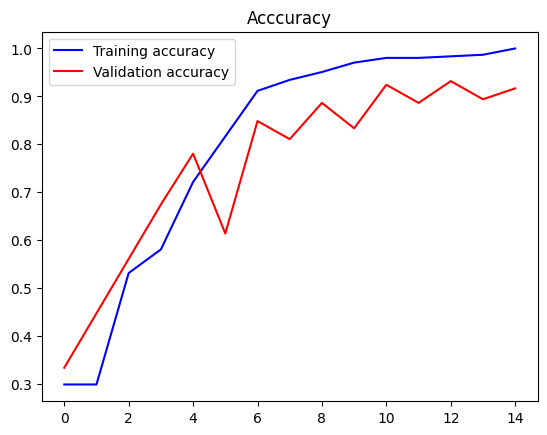

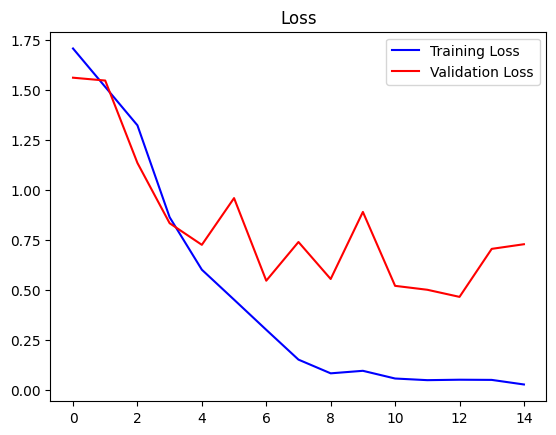

In [23]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Acccuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [24]:
text = 'saya lebih memilih liburan ke destinasi yang berada di sepanjang pantai untuk menikmati deburan ombak, mengeksplorasi kehidupan laut, dan menikmati keindahan alam di sekitar pantai'
seq = tokenizer.texts_to_sequences([text])
pad = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predicted = np.argmax(model.predict(pad, verbose=0))
result = y_index_word[predicted]
result

'Bahari'

In [25]:
text = 'saya lebih tertarik untuk menjelajahi destinasi wisata yang kaya akan warisan budaya, seperti mengunjungi museum, situs bersejarah, festival tradisional, dan bertemu dengan penduduk lokal untuk memahami lebih dalam tentang kehidupan dan budaya mereka'
seq = tokenizer.texts_to_sequences([text])
pad = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predicted = np.argmax(model.predict(pad, verbose=0))
result = y_index_word[predicted]
result

'Budaya'

In [26]:
text = 'saya sangat tertarik dengan keindahan alam dan keanekaragaman hayati untuk menikmati kecantikan alam yang masih alami, menjelajahi beragam ekosistem, serta mempelajari dan menghargai keanekaragaman flora dan fauna yang ada di sana'
seq = tokenizer.texts_to_sequences([text])
pad = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
predicted = np.argmax(model.predict(pad, verbose=0))
result = y_index_word[predicted]
result

'Cagar Alam'

In [27]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
